# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [19]:
import numpy as np
from glob import glob


# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


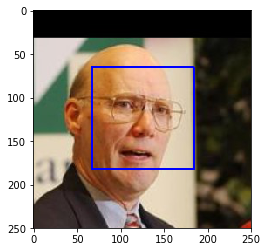

In [20]:
import cv2                
import matplotlib.pyplot as plt 

%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[2020])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [21]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [22]:
from tqdm import tqdm


human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#
face_detected = 0
face_missdetected = 0

for face in human_files_short:
    if(face_detector(face)):
        face_detected +=1
        
for face in dog_files_short:
    if(face_detector(face)):
        face_missdetected +=1
        
print(f'Right faces detected:{face_detected}')
print(f'accuracy: {face_detected * 100/len(human_files_short)} %')

print(f'Wrong faces detected:{face_missdetected}')
print(f'accuracy: {face_missdetected * 100/len(dog_files_short)} %')


Right faces detected:98
accuracy: 98.0 %
Wrong faces detected:17
accuracy: 17.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [29]:
import torch
import torchvision.models as models

# define alternative better resNet 50 model (which outperform VGG16 in the past years in terms of efficency)
resNet = models.resnet50(pretrained=True)

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    resNet = resNet.cuda()

#### Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

tensor([ 243], device='cuda:0')


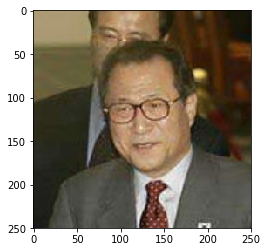

In [24]:
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''

    data_transform = transforms.Compose([transforms.Resize((224,224)),
                    transforms.ToTensor(),
                    transforms.Normalize([0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])])
    
    img = Image.open(img_path)
    img = data_transform(img)
    img = img.cuda()
    # expect several images so an array of arrays, wrap the image into another array
    output = VGG16(img.unsqueeze(0))

    _, index = torch.max(output, 1)
    return index # predicted class index

print(VGG16_predict(dog_files_short[10]))
plt.imshow(Image.open(human_files_short[10]))
plt.show()

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [25]:
### returns "True" if a dog is detected in the image stored at img_path

def dog_detector(img_path):
    data_transform = transforms.Compose([transforms.Resize((224,224)),
                    transforms.ToTensor(),
                    transforms.Normalize([0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])])
    
    img = Image.open(img_path)
    img = data_transform(img)
    img = img.cuda()
    # expect several images so an array of arrays, wrap the image into another array
    output = VGG16(img.unsqueeze(0))

    _, index = torch.max(output, 1)
    if(index>=151 and index<=268):
        return True
    else:
        return False


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [26]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

dog_detected = 0
dog_missdetected = 0

for human in human_files_short:
    if(dog_detector(human)):
        dog_missdetected +=1
        
for dog in dog_files_short:
    if(dog_detector(dog)):
        dog_detected +=1
        
print(f'Right dog detected:{dog_detected}')
print(f'accuracy: {dog_detected * 100/len(dog_files_short)} %')

print(f'Wrong dogs detected:{dog_missdetected}')
print(f'Misstetection rate: {dog_missdetected * 100/len(dog_files_short)} %')


Right dog detected:100
accuracy: 100.0 %
Wrong dogs detected:0
Misstetection rate: 0.0 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [32]:
# ALTERNATIVE MODEL USING RESNET 50 (better in terms of timing than RESNET 101 and better in terms of performance than VGG16)

def improved_dog_detector(img_path):
    data_transform = transforms.Compose([transforms.Resize((224,224)),
                    transforms.ToTensor(),
                    transforms.Normalize([0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])])
    
    img = Image.open(img_path)
    img = data_transform(img)
    img = img.cuda()
    # expect several images so an array of arrays, wrap the image into another array
    output = resNet(img.unsqueeze(0))

    _, index = torch.max(output, 1)
    if(index>=151 and index<=268):
        return True
    else:
        return False

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

dog_detected = 0
dog_missdetected = 0

for human in human_files_short:
    if(dog_detector(human)):
        dog_missdetected +=1
        
for dog in dog_files_short:
    if(dog_detector(dog)):
        dog_detected +=1
        
print(f'Right dog detected:{dog_detected}')
print(f'accuracy: {dog_detected * 100/len(dog_files_short)} %')

print(f'Wrong dogs detected:{dog_missdetected}')
print(f'Missdetetection rate: {dog_missdetected * 100/len(dog_files_short)} %')

Right dog detected:100
accuracy: 100.0 %
Wrong dogs detected:0
Missdetetection rate: 0.0 %


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [19]:
import torch
import os
from torchvision import datasets,transforms


# define training and test data directories
train_dir = '/data/dog_images/train'
validation_dir = '/data/dog_images/valid'
test_dir = '/data/dog_images/test'

data_dir = '/data/dog_images'

# Tried to apply transforms.RandomErasing(p=0.1) to the data augmentation step but it seems that torch in this notebook
# must not have been updated for a while. Any hint on how can I update torch on a notebook for future projects whithout
# aterating or having issues with depreciated features ?

transform_training = transforms.Compose([transforms.Resize((256,256)),
                                         transforms.RandomHorizontalFlip(),
                                         transforms.RandomVerticalFlip(0.2),
                                         transforms.RandomRotation(10),
                                      transforms.ToTensor(),
                                    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])])

transform_testing = transforms.Compose([transforms.Resize((256,256)),
                                      transforms.ToTensor(),
                                    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])])


train_data = datasets.ImageFolder(train_dir, transform=transform_training)
valid_data = datasets.ImageFolder(validation_dir, transform=transform_testing)
test_data = datasets.ImageFolder(test_dir, transform=transform_testing)


train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform_training)
valid_dataset = datasets.ImageFolder(os.path.join(data_dir, 'valid'), transform=transform_testing)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=transform_testing)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(valid_data))
print('Num test images: ', len(test_data))

# define dataloader parameters
batch_size = 32
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)
validation_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=True)

Num training images:  6680
Num validation images:  835
Num test images:  836


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 

For the input tensor I have decided to resize the image to make all images 256x256 pixels. This size will ensure images are enough big to keep the most important features and small enough to keep the runtime good. Instead of croping I have decided to just resize the images so that the most important features of a dog face like ears or head shape are not cropped out (as periferial features of these images also have relevant information). 

Also, given such a small number of input features, I have decided to work with data augmentation as otherwise the network would experience overfitting. I have added some horizontal and vertical random flips (vertical less probable than horizontal with 20% chance vs 50% chance as it is less likely we will encounter this in real life but it will help the network generalise without regards to the position or orientation in the image). I also used some random rotation but I noticed that having a higgher rotation degree will increase black regions (not part of the image) and might get some features out of the frame so I have decided to keep this parameter low to increase generalization without giving away important periferial features. 

I am aware that some periferial features might not be that relevant but I think finding a balance between data augmentation (generalization) and loosing important features is the right choice. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [20]:
import torch.nn as nn
import torch.nn.functional as F


# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,32,kernel_size=3,padding = 1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32,64,kernel_size=3,padding = 1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64,128,kernel_size=3,padding = 1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128,256,kernel_size=3,padding = 1)
        self.bn4 = nn.BatchNorm2d(256)
        self.conv5 = nn.Conv2d(256,512,kernel_size=3,padding = 1)
        self.bn5 = nn.BatchNorm2d(512)

        self.fc1 = nn.Linear(512*8*8, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 133)

        self.pool = nn.MaxPool2d(2,2)
        self.dropout = nn.Dropout(p=0.5)
        
        ## Define layers of a CNN
    
    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x)))) #256/2 -> 128
        x = self.pool(F.relu(self.bn2(self.conv2(x)))) #128/2 -> 64
        x = self.pool(F.relu(self.bn3(self.conv3(x)))) #64/2 -> 32
        x = self.pool(F.relu(self.bn4(self.conv4(x)))) #32/2 -> 16
        x = self.pool(F.relu(self.bn5(self.conv5(x)))) #16/2 -> 8
        x = x.view(-1,512*8*8)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)

        
        ## Define forward behavior
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()


Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=32768, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=51

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

The network follows the principle of keeping things as simple as possible while bringing the biggest performance/GPU time that I could. I did not want a too complex model with many convolutional layers as that would take for ages and this is just for learning purposes neither I wanted a network with just a couple of layers that could not abstract relevant shapes so I have decided that a network with 5 convolutional layers was probably ok for this task following the example on the section of autoencoders for style transfer (which had around 5 convolutional layers too which would detect the content and style). 

Moreover, between these layers I have decided to implement batch normalization as I was having issues with how long it was taking the GPU to train. This helps improve the training speed by normalizing the outputs of the hidden layers (just like normalization does with the input layer) and it has a small regularization effect (as it adds some noise to the outputs) also reducing overfitting. With batch normalization I can also use higher learning rates because it makes sure that there is no activation that has gone really high or low. This will let me train further. 

In terms of the fully connected layers I believed that 3 layers was a good number of layers to train enough without overfitting. I tested with two layers and adding an extra layer seemed to improved the performance. I also made sure that the last hidden layer had at least double or triple the amount of outputs for its hidden units to avoid underfitting. 

Finally I used 2x2 normal max pooling layers to reduce dimensionallity while keeping relevant filtered features and dropout to reduce overfitting in the fully connected part of the network while also reducing computational time. The activation functions were relu but I reckon a leaky rely activation function might have been better if I was to increase the network depth (i.e more convolutional and fully connected layers) to avoid the vanishing gradient problem that relu does not completely solve. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [21]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(),lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [26]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            # clear gradients of all optimized variables
            optimizer.zero_grad()

            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            # update training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))            

        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
           
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


loaders_scratch = {'train': train_loader,
                   'valid': validation_loader,
                   'test': test_loader}

# train the model. NOTE: I have done other 25 epochs before this second training, so if you are running this from
# scratch go for 50 instead. 
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 3.612783 	Validation Loss: 3.545609
Validation loss decreased (inf --> 3.545609). Saving model...
Epoch: 2 	Training Loss: 3.591898 	Validation Loss: 3.574076
Epoch: 3 	Training Loss: 3.529108 	Validation Loss: 3.421157
Validation loss decreased (3.545609 --> 3.421157). Saving model...
Epoch: 4 	Training Loss: 3.477351 	Validation Loss: 3.434209
Epoch: 5 	Training Loss: 3.412014 	Validation Loss: 3.331714
Validation loss decreased (3.421157 --> 3.331714). Saving model...
Epoch: 6 	Training Loss: 3.370603 	Validation Loss: 3.398848
Epoch: 7 	Training Loss: 3.322346 	Validation Loss: 3.265200
Validation loss decreased (3.331714 --> 3.265200). Saving model...
Epoch: 8 	Training Loss: 3.280552 	Validation Loss: 3.421148
Epoch: 9 	Training Loss: 3.232454 	Validation Loss: 3.165528
Validation loss decreased (3.265200 --> 3.165528). Saving model...
Epoch: 10 	Training Loss: 3.221044 	Validation Loss: 3.199707
Epoch: 11 	Training Loss: 3.128904 	Validation Loss: 3.1303

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [2]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [3]:
import torch
import os
from torchvision import datasets,transforms
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


train_dir = '/data/dog_images/train'
validation_dir = '/data/dog_images/valid'
test_dir = '/data/dog_images/test'


transform_training = transforms.Compose([transforms.Resize((240,240)),
                                         transforms.RandomHorizontalFlip(),
                                         transforms.RandomVerticalFlip(),
                                         transforms.RandomRotation(10),
                                      transforms.ToTensor(),
                                    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])])

transform_testing = transforms.Compose([transforms.Resize((240,240)),
                                      transforms.ToTensor(),
                                    transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])])


train_data = datasets.ImageFolder(train_dir, transform=transform_training)
valid_data = datasets.ImageFolder(validation_dir, transform=transform_testing)
test_data = datasets.ImageFolder(test_dir, transform=transform_testing)


# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(valid_data))
print('Num test images: ', len(test_data))

# define dataloader parameters
batch_size = 32
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=True)
validation_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,
                                           num_workers=num_workers, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers, shuffle=False)

loaders_transfer = {'train': train_loader, 'valid' : validation_loader, 'test': test_loader}

Num training images:  6680
Num validation images:  835
Num test images:  836


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [4]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# define VGG16 model
model_transfer = models.resnet50(pretrained=True)

# lock previous layer weights
for param in model_transfer.parameters():
    param.requires_grad = False

classes = len(train_data.classes)
n_inputs = model_transfer.fc.in_features
lastLayer = nn.Linear(8192,classes)
model_transfer.fc = lastLayer
# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()



Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 93343068.66it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

So for this transfer learning model I have decided to use the ResNet model which according to [these series of tests](https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/) has given one of the best performance/GPU time balance. 

Therefore, I have decided to go for using this model and just modifying the last fully connected layer to our dog detector purpose and leave the rest as it was to use the filters and weights that classify images correctly. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [5]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(),lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [6]:
import numpy as np

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            # clear gradients of all optimized variables
            optimizer.zero_grad()

            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            # update training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))            

        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
           
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


loaders_scratch = {'train': train_loader,
                   'valid': validation_loader,
                   'test': test_loader}

# train the model. NOTE: I have done other 25 epochs before this second training, so if you are running this from
# scratch go for 50 instead. 
model_transfer = train(25, loaders_transfer, model_transfer, optimizer_transfer, 
                      criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 3.560339 	Validation Loss: 1.512830
Validation loss decreased (inf --> 1.512830). Saving model...
Epoch: 2 	Training Loss: 2.314066 	Validation Loss: 1.372921
Validation loss decreased (1.512830 --> 1.372921). Saving model...
Epoch: 3 	Training Loss: 2.165293 	Validation Loss: 1.299294
Validation loss decreased (1.372921 --> 1.299294). Saving model...
Epoch: 4 	Training Loss: 1.974133 	Validation Loss: 1.564351
Epoch: 5 	Training Loss: 1.912523 	Validation Loss: 1.389369
Epoch: 6 	Training Loss: 1.827330 	Validation Loss: 1.362356
Epoch: 7 	Training Loss: 1.785537 	Validation Loss: 1.288494
Validation loss decreased (1.299294 --> 1.288494). Saving model...
Epoch: 8 	Training Loss: 1.836579 	Validation Loss: 1.178953
Validation loss decreased (1.288494 --> 1.178953). Saving model...
Epoch: 9 	Training Loss: 1.761868 	Validation Loss: 1.251583
Epoch: 10 	Training Loss: 1.610133 	Validation Loss: 1.381878
Epoch: 11 	Training Loss: 1.492806 	Validation Loss: 1.4739

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [7]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.107827


Test Accuracy: 76% (640/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

Bernese mountain dog


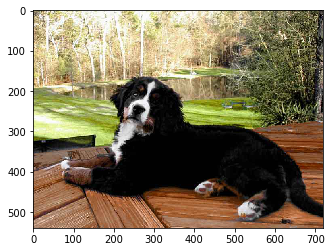

In [13]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    
    data_transform = transforms.Compose([transforms.Resize((240,240)),
                    transforms.ToTensor(),
                    transforms.Normalize([0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])])
    
    img = Image.open(img_path)
    img = data_transform(img)
    img = img.cuda()
    # expect several images so an array of arrays, wrap the image into another array
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))
    model_transfer.eval()
    output = model_transfer(img.unsqueeze(0))

    _, index = torch.max(output, 1)
    
    return class_names[index]

path = dog_files[1995]
print(predict_breed_transfer(path))
plt.imshow(Image.open(path))
plt.show()

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

That is a doggie
Mastiff


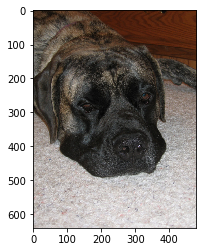

In [36]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    
    if dog_detector(img_path):
        print('That is a doggie')
        return predict_breed_transfer(img_path)
    elif face_detector(img_path):
        print('That is a human but it looks like...')
        return predict_breed_transfer(img_path)
    else:
        print('This must be an alient (either that or I missed my glasses in the CPU).Please provide a human/dog face.')
        
    ## handle cases for a human face, dog, and neither
path = dog_files[10]
print(run_app(path))
plt.imshow(Image.open(path))
plt.show()


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

# Conclussion

I expected an reasonable output of around 70-90% accuracy although I got around 75% of accuracy. I think my final app could have beeen improved in the following fields: 



 - **Visually:** I believe the dog/human/breed detector could have improved its output if for instance I add a pie chart or a bar chart with the top 5 or top 10 probabilities of a class. I.e for a dog image, provide as an output the dog image and a chart with the 10 most probable breed classifications along with the predicted output. Same for the human to breed predictor. That would be really usuful to visualise the network behaviour along with wether the prediction was right or wrong (specially in terms of breeds that not everyone knows all of them well). 
 
 
 
 - **Top class predictors:** Both the dog and specially the face detector could have been extensively improved and they have a higher priority than the breed detector as not detecting a dog is definitely worse than getting wrong the breed. I have improved the dog detector using resNet50 at the beginning of this notebook but I believe that if I would have modified its last few layers to focus on detecting dogs it could have improved its performance. In terms of the face detector this is a more tricky question as there is not a single class for human face in the Image Net dataset. Therefore, I could not apply the same technique as I did for the dog detector and I would have to train a model from scratch or with transfer learning with a new sub dataset where I know which images do have faces. For this I could look for classes like cowboy or family and make sure those contain in their totallity human faces. Then taking those classes, label them as containing faces and train the network (from scratch or even better using a transfer model) with these and other classes without faces. I believe this would improve the accuracy. 
 
 
 
 
 - **Hyperparameter tunning:** I could have improved the hyperparameter tunning with the models specially with regards to the learning rate and maybe explore using Nadam as the loss function which usually gets more robust results from my experience using Keras. Aditionally, I could have researched further how relevant or beneficial might be the different data augmentation techniques and which ones would increase performance without increasing too much the GPU time rather than just guessing from my logic (many times specially in science things are not what they seemed to be from our rationale). 
 
- **Training stop:** During training I could have set the network to stop traning if the validation loss has not decreased after x amount of epochs (5 for instance). In this way I would have reduced the long time it takes for training while keeping a good accuracy. 
 
 
 
 
 For being a learning project though, I am satisfied with the results obtained. However, for image detection of things that require higher precission and recall like disease diagnosis or engineering (specially civil and mechanical) analysis the accuracy would not be enough. 

That is a human but it looks like...
American water spaniel


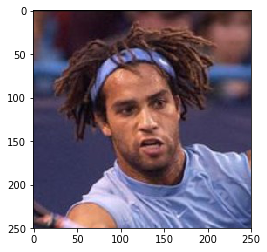

That is a human but it looks like...
American water spaniel


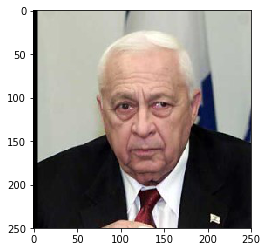

That is a human but it looks like...
American water spaniel


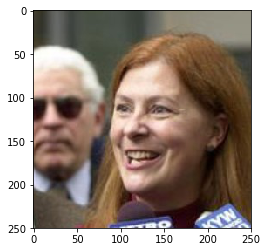

That is a human but it looks like...
Finnish spitz


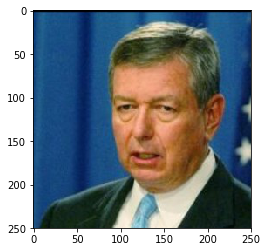

That is a human but it looks like...
American water spaniel


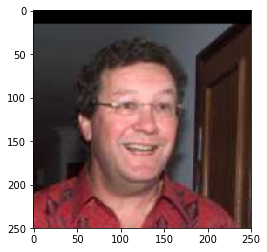

That is a human but it looks like...
American water spaniel


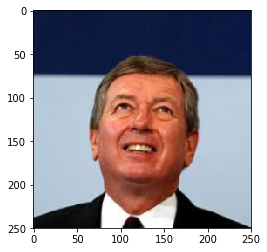

That is a human but it looks like...
Cairn terrier


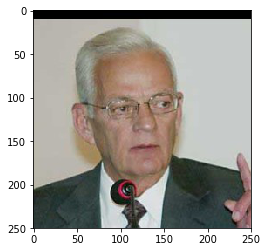

That is a human but it looks like...
American water spaniel


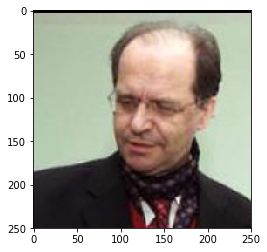

That is a human but it looks like...
Australian terrier


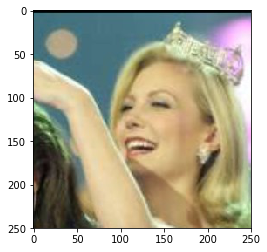

That is a human but it looks like...
Xoloitzcuintli


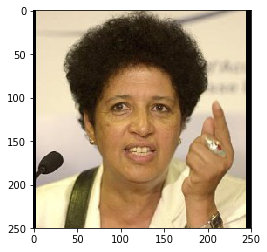

That is a doggie
Bearded collie


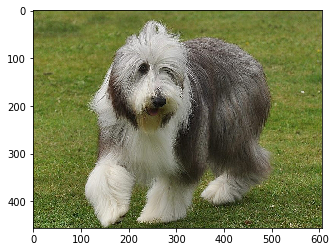

That is a doggie
English springer spaniel


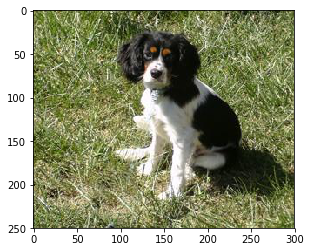

That is a doggie
Cane corso


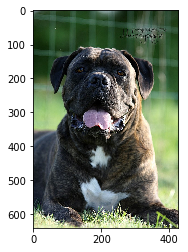

That is a doggie
Collie


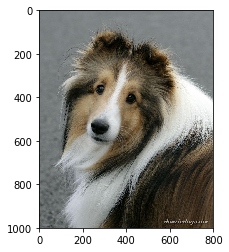

That is a doggie
Irish setter


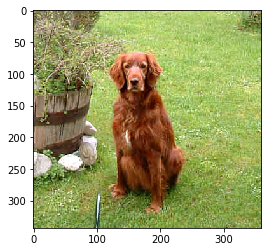

That is a doggie
Chihuahua


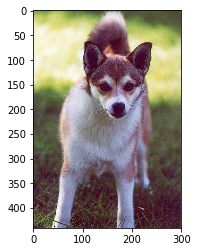

That is a doggie
Norwegian elkhound


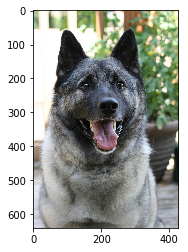

That is a doggie
Dogue de bordeaux


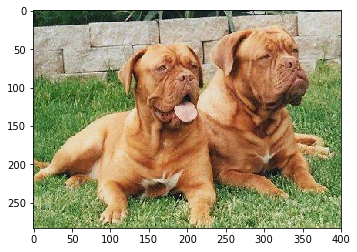

That is a doggie
Beauceron


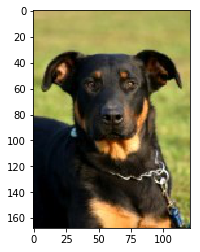

That is a doggie
Collie


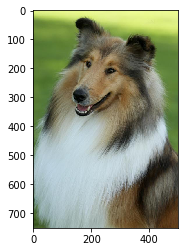

In [49]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
## suggested code, below

# select random indices of the arrays so that every time we run this we get random images
# this avoids to get the same breed of dog continuosly
humans = np.random.randint(0,len(human_files),10)
dogs = np.random.randint(0,len(dog_files),10)

for file in np.hstack((human_files[humans], dog_files[dogs])):
    print(run_app(file))
    plt.imshow(Image.open(file))
    plt.show()